# 라이브러리

In [1]:
import os
import datetime

import pandas as pd
import numpy as np
import missingno as msno

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 데이터

In [10]:
!unzip ./open.zip

Archive:  ./open.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
   creating: 건설안전지침/
  inflating: 건설안전지침/F.C.M 교량공사 안전보건작업 지침.pdf  
  inflating: 건설안전지침/I.L.M 교량공사 안전보건작업 지침.pdf  
  inflating: 건설안전지침/PCT거더 교량공사 안전보건작업지침.pdf  
  inflating: 건설안전지침/가공송전선로 철탑 심형기초공사 안전보건작업 지침.pdf  
  inflating: 건설안전지침/가설계단 설치 및 사용 안전보건작업 지침.pdf  
  inflating: 건설안전지침/가설구조물의 설계변경 요청 내용, 절차 등에 관한 작성지침.pdf  
  inflating: 건설안전지침/강관비계 안전작업지침.pdf  
  inflating: 건설안전지침/강박스거더 교량공사 안전보건작업 지침.pdf  
  inflating: 건설안전지침/강아치교(벤트공법) 안전보건작업지침.pdf  
  inflating: 건설안전지침/갱폼(Gang form) 제작 및 사용안전 지침.pdf  
  inflating: 건설안전지침/건설공사 굴착면 안전기울기 기준에 관한 기술지침.pdf  
  inflating: 건설안전지침/건설공사 돌관작업 안전보건작업 지침.pdf  
  inflating: 건설안전지침/건설공사 안전보건 설계 지침.pdf  
  inflating: 건설안전지침/건설공사의 고소작업대 안전보건작업지침.pdf  
  inflating: 건설안전지침/건설기계 안전보건작업 지침.pdf  
  inflating: 건설안전지침/건설현장 용접용단 안전보건작업 기술지침.pdf  
  inflating: 건설안전지침/건설현장의 중량물 취급 작업계획서(이동식크레인) 작성지침.pdf  
  inflating: 건설안전지침/건축물의

In [11]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

# 목적

데이터의 간략한 파악 및 품질 확인

산출물 : 데이터 유형, 범위, 품질, 특이사항

# 분석

## 1. overview

In [12]:
# 건설안전지침 폴더의 pdf 파일 갯수
len(os.listdir("건설안전지침"))

104

In [13]:
# train/test 데이터 shape
train.shape, test.shape

((23422, 18), (964, 17))

In [14]:
# train 데이터의 column
train.columns.tolist()

['ID',
 '발생일시',
 '사고인지 시간',
 '날씨',
 '기온',
 '습도',
 '공사종류',
 '연면적',
 '층 정보',
 '인적사고',
 '물적사고',
 '공종',
 '사고객체',
 '작업프로세스',
 '장소',
 '부위',
 '사고원인',
 '재발방지대책 및 향후조치계획']

In [15]:
# test 데이터의 column
test.columns.tolist()

['ID',
 '발생일시',
 '사고인지 시간',
 '날씨',
 '기온',
 '습도',
 '공사종류',
 '연면적',
 '층 정보',
 '인적사고',
 '물적사고',
 '공종',
 '사고객체',
 '작업프로세스',
 '장소',
 '부위',
 '사고원인']

In [16]:
# submission 양식
submission.head(1)

,ID,재발방지대책 및 향후조치계획,vec_0,vec_1,vec_2,vec_3,vec_4,vec_5,vec_6,vec_7,...,vec_758,vec_759,vec_760,vec_761,vec_762,vec_763,vec_764,vec_765,vec_766,vec_767
0,TEST_000,안전교육 실시,-0.620284,-0.377644,-0.321682,0.148727,-0.193202,0.662165,1.092194,-0.043897,...,1.336321,0.882164,1.780816,2.430824,0.801544,0.016859,-0.152427,0.243186,0.267703,0.109774


<Axes: >

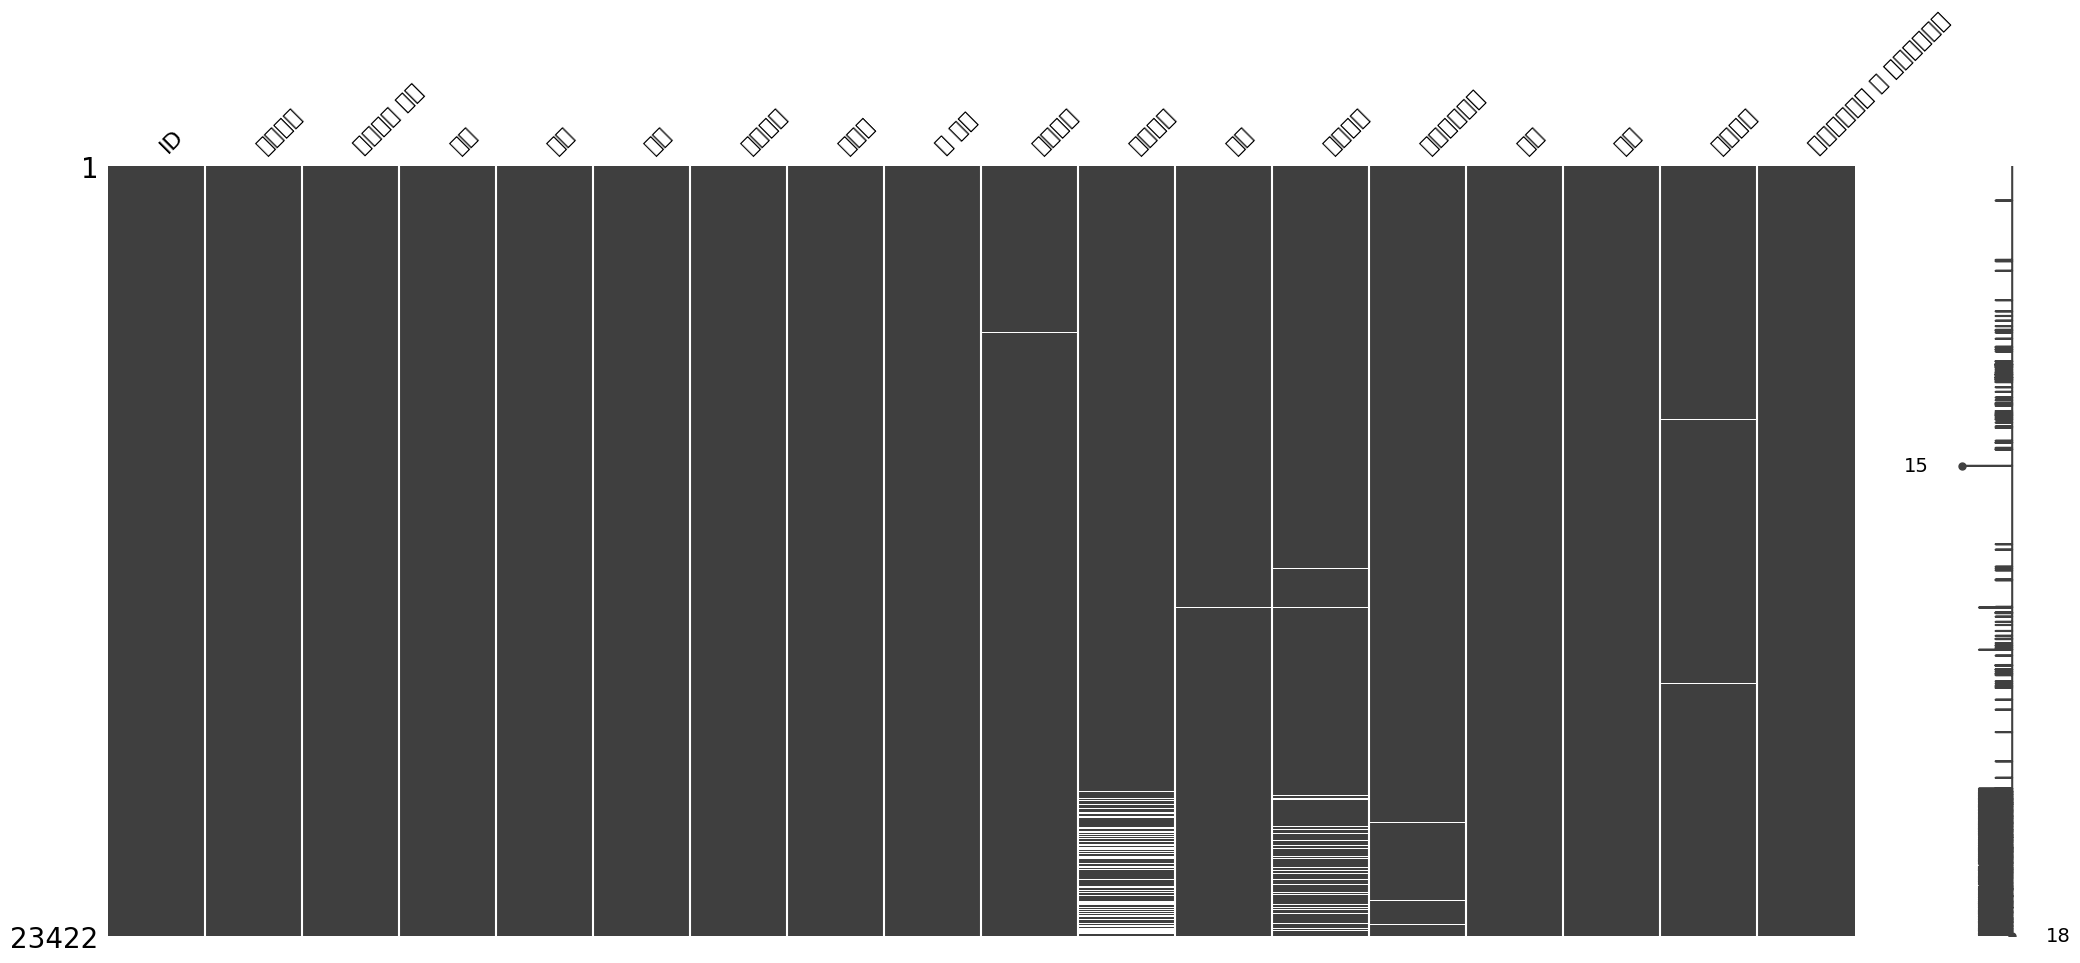

In [17]:
# train 데이터 간단한 결측 시각화
msno.matrix(train)

<Axes: >

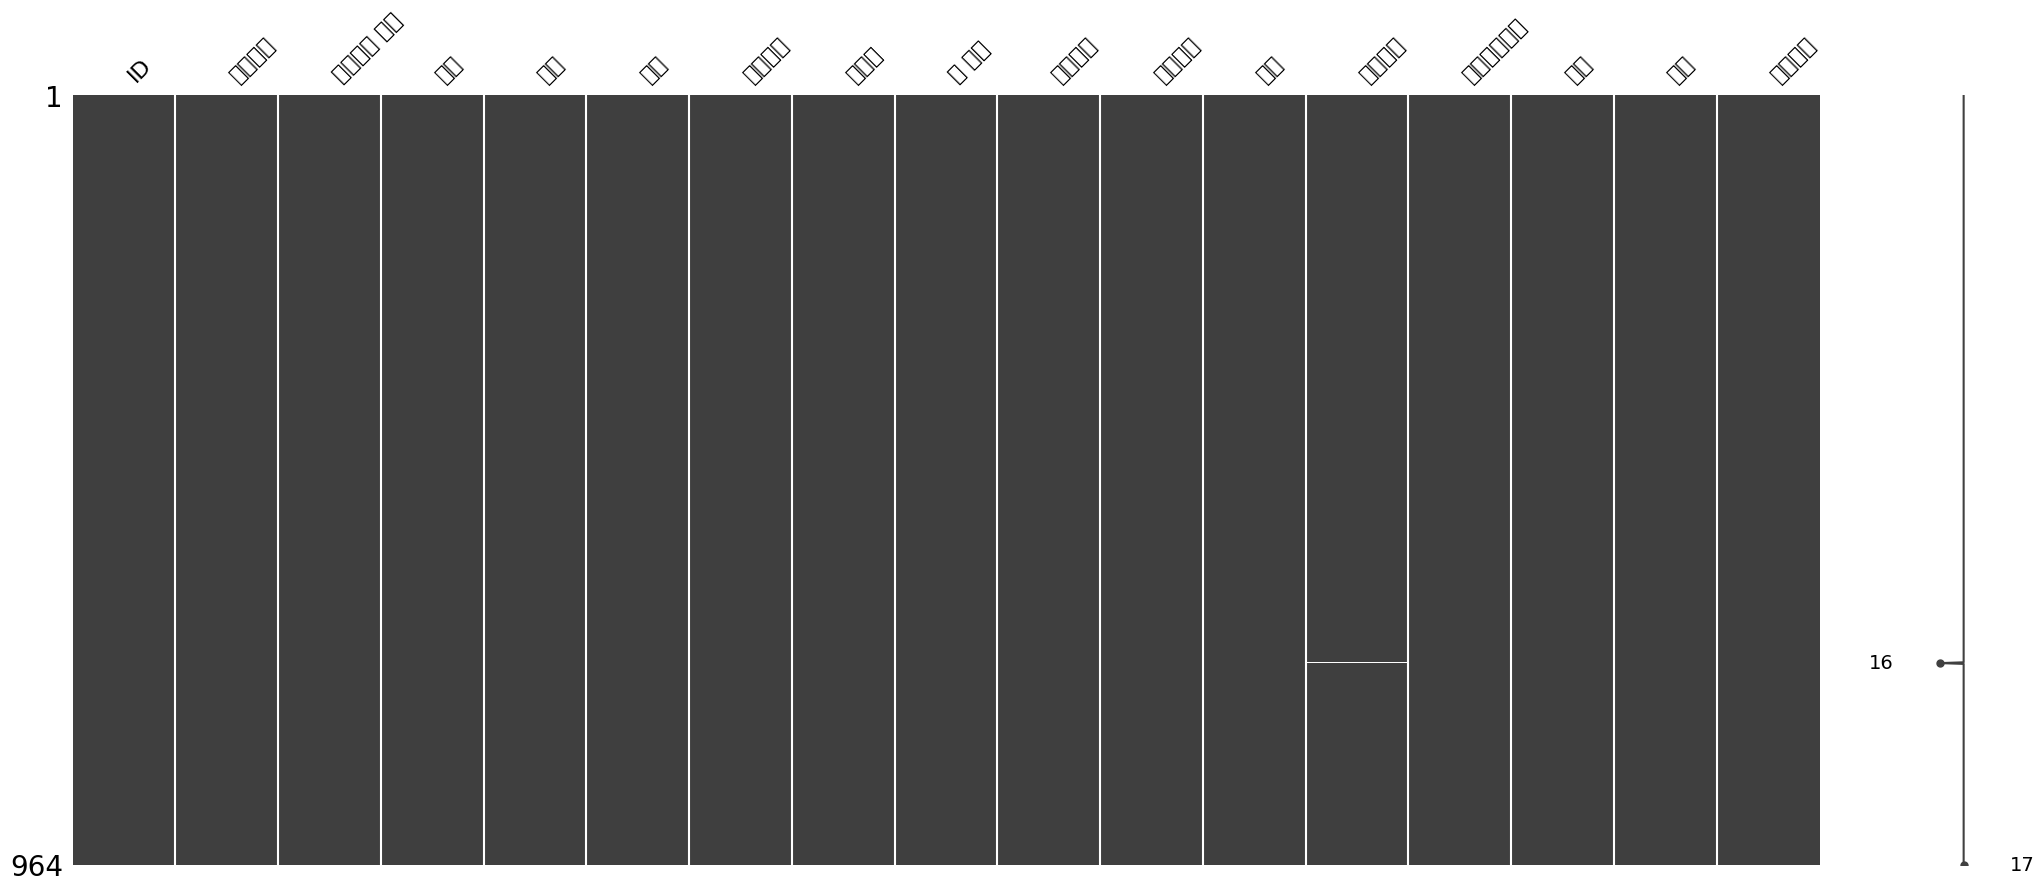

In [18]:
# test 데이터 간단한 결측 시각화
msno.matrix(test)

In [324]:
# 중복데이터
train[train.duplicated(keep = False)]

,ID,발생일시,사고인지 시간,날씨,기온,습도,공사종류,연면적,층 정보,인적사고,물적사고,공종,사고객체,작업프로세스,장소,부위,사고원인,재발방지대책 및 향후조치계획


In [323]:
# 중복데이터
train[train.drop("ID",axis=1).duplicated(keep = False)]

,ID,발생일시,사고인지 시간,날씨,기온,습도,공사종류,연면적,층 정보,인적사고,물적사고,공종,사고객체,작업프로세스,장소,부위,사고원인,재발방지대책 및 향후조치계획
1087,TRAIN_01087,2023-10-30 오전 10:35,정규작업 -,맑음,18℃,60%,건축 / 건축물 / 공장,"6,003.03㎡","지상 3층, 지하 1층",떨어짐(3미터 이상 ~ 5미터 미만),없음,건축 > 철골공사,가시설 > 낙하물방지망,양중작업,공장 / 내부,낙하물방지망 / 고소,안전걸이 미실시로 인한 추락,"작업자 안전 교육 관리 강화, 고소작업 및 건설기계작업 시 유도원 및 안전감시자 배..."
1088,TRAIN_01088,2023-10-30 오전 10:35,정규작업 -,맑음,18℃,60%,건축 / 건축물 / 공장,"6,003.03㎡","지상 3층, 지하 1층",떨어짐(3미터 이상 ~ 5미터 미만),없음,건축 > 철골공사,가시설 > 낙하물방지망,양중작업,공장 / 내부,낙하물방지망 / 고소,안전걸이 미실시로 인한 추락,"작업자 안전 교육 관리 강화, 고소작업 및 건설기계작업 시 유도원 및 안전감시자 배..."
1292,TRAIN_01292,2023-10-18 오후 04:10,정규작업 -,맑음,21℃,50%,건축 / 건축물 / 업무시설,"94,420.82㎡","지상 15층, 지하 5층",떨어짐(3미터 이상 ~ 5미터 미만),없음,건축 > 철근콘크리트공사,시설물 > 건물,이동,업무시설 / 외부,건물 / 상부(위),옥상층 헬리포트 끝 단부구간 미장 작업중 원인미상으로 재해자가 4M아래 바닥면으로 ...,건설공사 관계자 안전조치 교육 실시.
1293,TRAIN_01293,2023-10-18 오후 04:10,정규작업 -,맑음,21℃,50%,건축 / 건축물 / 업무시설,"94,420.82㎡","지상 15층, 지하 5층",떨어짐(3미터 이상 ~ 5미터 미만),없음,건축 > 철근콘크리트공사,시설물 > 건물,이동,업무시설 / 외부,건물 / 상부(위),옥상층 헬리포트 끝 단부구간 미장 작업중 원인미상으로 재해자가 4M아래 바닥면으로 ...,건설공사 관계자 안전조치 교육 실시.
1895,TRAIN_01895,2023-09-11 오전 10:30,정규작업 -,맑음,25℃,30%,건축 / 건축물 / 공동주택,"51,447.10㎡","지상 23층, 지하 5층",기타,없음,건축 > 철골공사,기타 > 차량,설치작업,공동주택 / 내부,차량 / 앞,굴착기 운전자의 운전미숙으로 인한 사고,"철골 관련 경험이 많은 굴착기 운전원 교체, 기존 신호체계 확인 및 보완, 위험요인..."
1896,TRAIN_01896,2023-09-11 오전 10:30,정규작업 -,맑음,25℃,30%,건축 / 건축물 / 공동주택,"51,447.10㎡","지상 23층, 지하 5층",기타,없음,건축 > 철골공사,기타 > 차량,설치작업,공동주택 / 내부,차량 / 앞,굴착기 운전자의 운전미숙으로 인한 사고,"철골 관련 경험이 많은 굴착기 운전원 교체, 기존 신호체계 확인 및 보완, 위험요인..."
2453,TRAIN_02453,2023-08-07 오후 02:30,식사ㆍ휴식 등 -,맑음,35℃,70%,건축 / 건축물 / 교육연구시설,"5,384.46㎡","지상 4층, 지하 1층",떨어짐(3미터 이상 ~ 5미터 미만),없음,건축 > 창호 및 유리공사,건설자재 > 창호,설치작업,교육연구시설 / 외벽,창호 / 건물 배면과 외부비계 사이,건물 2층에서 휴식 후 작업 재개를 위해 일어나는 중 어지러움을 호소하며 떨어짐(같...,"작업자에 대한 안전교육 강화와 안전수칙 준수 지도, 안전사고 재발 방지를 위한 안전..."
2456,TRAIN_02456,2023-08-07 오후 02:30,식사ㆍ휴식 등 -,맑음,35℃,70%,건축 / 건축물 / 교육연구시설,"5,384.46㎡","지상 4층, 지하 1층",떨어짐(3미터 이상 ~ 5미터 미만),없음,건축 > 창호 및 유리공사,건설자재 > 창호,설치작업,교육연구시설 / 외벽,창호 / 건물 배면과 외부비계 사이,건물 2층에서 휴식 후 작업 재개를 위해 일어나는 중 어지러움을 호소하며 떨어짐(같...,"작업자에 대한 안전교육 강화와 안전수칙 준수 지도, 안전사고 재발 방지를 위한 안전..."
4137,TRAIN_04137,2023-05-06 오전 09:30,정규작업 -,맑음,15℃,90%,건축 / 건축물 / 공장,"33,333.84㎡","지상 1층, 지하 10층",떨어짐(2미터 미만),없음,건축 > 건축물 부대공사,건설공구 > 사다리,기타,공장 / 내부,사다리 / 상부(위),4단 사다리에 올라가다 3단(높이80cm) 위치에서 천정에 있는 배관을 잡고 올라서...,안전교육을 통한 근로자 안전의식 고취와 사다리 사용 시 아우트리거 설치 등 안전수칙...
4138,TRAIN_04138,2023-05-06 오전 09:30,정규작업 -,맑음,15℃,90%,건축 / 건축물 / 공장,"33,333.84㎡","지상 1층, 지하 10층",떨어짐(2미터 미만),없음,건축 > 건축물 부대공사,건설공구 > 사다리,기타,공장 / 내부,사다리 / 상부(위),4단 사다리에 올라가다 3단(높이80cm) 위치에서 천정에 있는 배관을 잡고 올라서...,안전교육을 통한 근로자 안전의식 고취와 사다리 사용 시 아우트리거 설치 등 안전수칙...


## 2. 변수 분석

### 2.1 ID

In [19]:
train['ID'].head(5)

,ID
0,TRAIN_00000
1,TRAIN_00001
2,TRAIN_00002
3,TRAIN_00003
4,TRAIN_00004


In [20]:
# 형식 일치 확인
(~train['ID'].str.match(r'^TRAIN_\d{5}$')).sum()

0

In [21]:
# 빠진 수 확인
(train['ID'].map(lambda x: int(x.replace("TRAIN_",""))) != range(len(train))).sum()

0

### 2.2 발생일시

In [22]:
train["발생일시"].head()

,발생일시
0,2023-12-31 오후 12:44
1,2023-12-30 오후 03:35
2,2023-12-30 오후 02:30
3,2023-12-30 오후 12:00
4,2023-12-30 오전 10:00


In [23]:
# 형식 일치 확인
(~train['발생일시'].str.match(r'^\d{4}-\d{2}-\d{2} (오전|오후) \d{2}:\d{2}$')).sum()

0

In [24]:
# 시간 형식 확인
t = train['발생일시'].map(lambda x: x[x.find("오"):])
t.head()

,발생일시
0,오후 12:44
1,오후 03:35
2,오후 02:30
3,오후 12:00
4,오전 10:00


In [25]:
(t == '오전 00:00').sum(), (t == '오전 12:00').sum(), (t == '오후 00:00').sum(), (t == '오후 12:00').sum()

(56, 0, 0, 149)

- datetime으로 변환 시 오후 12:00을 조심할 것

In [26]:
# 년 범위 확인
train['발생일시'].map(lambda x: x[:4]).unique()

array(['2023', '2022', '2021', '2020', '2019'], dtype=object)

In [27]:
# 월 범위 확인
train['발생일시'].map(lambda x: x[5:7]).unique()

array(['12', '11', '10', '09', '08', '07', '06', '05', '04', '03', '02',
       '01'], dtype=object)

In [28]:
# 일 범위 확인
train['발생일시'].map(lambda x: x[8:10]).unique()

array(['31', '30', '29', '28', '27', '26', '25', '24', '23', '22', '21',
       '20', '19', '18', '17', '16', '15', '14', '13', '12', '11', '10',
       '09', '08', '07', '06', '05', '04', '03', '02', '01'], dtype=object)

In [29]:
# 시 범위 확인
train['발생일시'].map(lambda x: x[14:16]).unique()

array(['12', '03', '02', '10', '09', '08', '04', '01', '11', '07', '06',
       '05', '00'], dtype=object)

In [30]:
# 분 범위 확인
train['발생일시'].map(lambda x: x[17:]).unique()

array(['44', '35', '30', '00', '16', '15', '20', '05', '55', '40', '10',
       '25', '50', '27', '11', '48', '19', '45', '22', '12', '14', '38',
       '28', '18', '07', '06', '37', '43', '01', '58', '13', '42', '53',
       '47', '26', '46', '41', '57', '03', '17', '23', '08', '04', '09',
       '34', '02', '56', '36', '52', '21', '32', '49', '51', '24', '31',
       '54', '33', '39', '59', '29'], dtype=object)

In [31]:
# 전처리
def preprocess_datetime(s):
    d, m, t = s.split()
    dt = d+" "+t
    dt = datetime.datetime.strptime(dt, "%Y-%m-%d %H:%M")
    if m == "오후" and dt.hour != 12:
        dt = dt + datetime.timedelta(hours = 12)
    return dt

In [32]:
t = train['발생일시'].map(preprocess_datetime)
t.head()

,발생일시
0,2023-12-31 12:44:00
1,2023-12-30 15:35:00
2,2023-12-30 14:30:00
3,2023-12-30 12:00:00
4,2023-12-30 10:00:00


In [33]:
# 전처리 검증 : 날짜가 달라진 경우가 있는지
(train['발생일시'].map(lambda x: int(x[8:10])) != t.map(lambda x: x.day)).sum()

0

<Axes: xlabel='dt'>

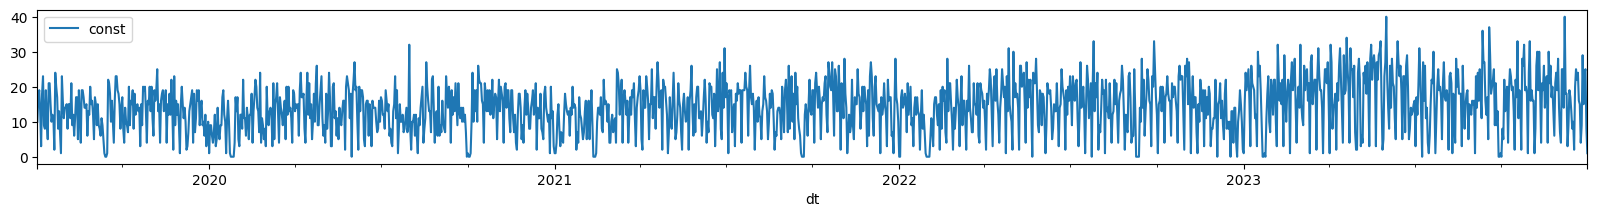

In [34]:
# 날짜분포
pd.DataFrame({'dt': t, 'const': 1}).set_index('dt').resample('D').sum().plot(figsize=(20,2))

<Axes: ylabel='Frequency'>

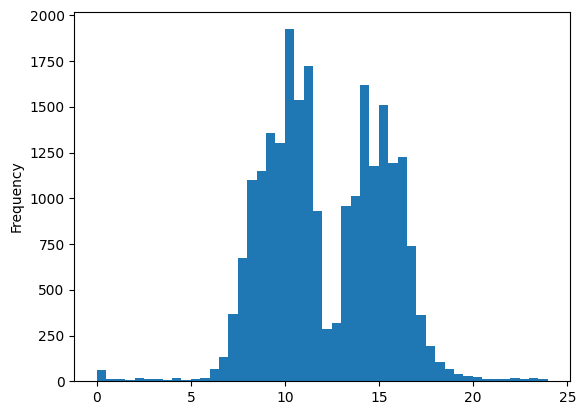

In [35]:
# 시간분포
t.map(lambda x: x.hour+x.minute/60).plot(kind='hist', bins=48)

### 2.3 사고인지 시간

In [36]:
train['사고인지 시간'].sample(frac=1).head()

,사고인지 시간
2405,정규작업 -
10834,정규작업 -
9352,정규작업 -
15312,정규작업 -
22678,정규작업 -


In [37]:
train['사고인지 시간'].value_counts()

,count
사고인지 시간,
정규작업 -,17564
-,3126
기타 -,637
휴일근무 -,611
작업 전 -,520
...,...
정규작업 - 2020-04-29 오전 09:04,1
정규작업 - 2020-05-04 오전 10:00,1
정규작업 - 2020-05-04 오후 04:01,1


- 작업 유형과 사고인지 시간으로 나눌 수 있을 것으로 보임
- 공통적인 형식은 구분자 -의 존재

In [38]:
# 데이터 분리
wtrt = train['사고인지 시간'].str.split('-', n=1, expand=True)
wtrt.columns = ['wt','rt']
wt = wtrt['wt']
rt = wtrt['rt']

In [39]:
wt.head()

,wt
0,정규작업
1,정규작업
2,정규작업
3,휴일근무
4,정규작업


In [40]:
rt.head()

,rt
0,
1,
2,
3,
4,


In [41]:
# 결측 드러내기
wt = wt.replace('',np.nan).str.strip()
rt = rt.replace('',np.nan).str.strip()

In [42]:
# work type
wt.value_counts()

,count
wt,
정규작업,17811
기타,688
휴일근무,623
작업 전,524
식사ㆍ휴식 등,273
출ㆍ퇴근 등,160
불류불능,114
연장근무,103


In [43]:
# 결측 비율
wt.isna().sum()/len(wt)*100

13.346426436683458

In [44]:
# recognition time
rt.unique()

array([nan, '2020-07-15 오전 11:00', '2020-07-13 오후 01:00',
       '2020-07-10 오후 01:20', '2020-07-10 오후 03:00',
       '2020-07-10 오전 09:05', '2020-07-10 오후 04:17',
       '2020-07-10 오전 10:00', '2020-07-08 오후 04:30',
       '2020-07-08 오후 01:00', '2020-07-08 오후 03:00',
       '2020-07-07 오후 01:00', '2020-07-07 오전 10:45',
       '2020-07-07 오전 10:00', '2020-07-07 오전 07:40',
       '2020-07-06 오전 10:10', '2020-07-06 오전 09:20',
       '2020-07-10 오전 11:03', '2020-07-05 오후 01:30',
       '2020-07-12 오후 03:45', '2020-07-03 오후 03:20',
       '2020-07-03 오후 02:00', '2020-07-03 오후 05:09',
       '2020-07-03 오전 09:00', '2020-07-02 오후 01:40',
       '2020-07-01 오후 02:22', '2020-07-01 오후 01:30',
       '2020-07-01 오후 03:20', '2020-07-01 오전 11:03',
       '2020-07-10 오후 05:08', '2020-07-03 오후 01:00',
       '2020-06-30 오후 03:40', '2020-06-30 오전 10:50',
       '2020-07-06 오후 02:07', '2020-06-29 오후 07:20',
       '2020-07-08 오후 05:09', '2020-07-13 오전 11:07',
       '2020-07-09 오후 05:53', '2020-06-29

In [45]:
# 형식 일치 확인
(~rt.dropna().str.match(r'^\d{4}-\d{2}-\d{2} (오전|오후) \d{2}:\d{2}$')).sum()

0

In [46]:
# 년 범위 확인
rt.dropna().map(lambda x: x[:4]).unique()

array(['2020', '2019'], dtype=object)

In [47]:
# 월 범위 확인
rt.dropna().map(lambda x: x[5:7]).unique()

array(['07', '06', '05', '04', '03', '02', '01', '12', '11', '10', '09',
       '08'], dtype=object)

In [48]:
# 일 범위 확인
rt.dropna().map(lambda x: x[8:10]).unique()

array(['15', '13', '10', '08', '07', '06', '05', '12', '03', '02', '01',
       '30', '29', '09', '28', '27', '26', '25', '23', '22', '20', '19',
       '18', '14', '17', '16', '11', '24', '04', '21', '31'], dtype=object)

In [49]:
# 시 범위 확인
rt.dropna().map(lambda x: x[14:16]).unique()

array(['11', '01', '03', '09', '04', '10', '07', '02', '05', '06', '08',
       '12'], dtype=object)

In [50]:
# 분 범위 확인
rt.dropna().map(lambda x: x[17:]).unique()

array(['00', '20', '05', '17', '30', '45', '40', '10', '03', '09', '22',
       '08', '50', '07', '53', '01', '02', '35', '15', '55', '33', '47',
       '21', '11', '25', '32', '06', '57', '24', '12', '28', '39', '19',
       '04', '13', '26', '14', '48', '46', '59', '43', '31', '41', '29',
       '49', '51', '34', '54', '23', '38', '37', '16', '18', '36', '52',
       '42'], dtype=object)

In [51]:
# 결측 비율
rt.isna().sum()/len(wt)*100

98.5739902655623

In [52]:
# 전처리
rt = rt.map(preprocess_datetime, na_action='ignore')

<Axes: xlabel='dt'>

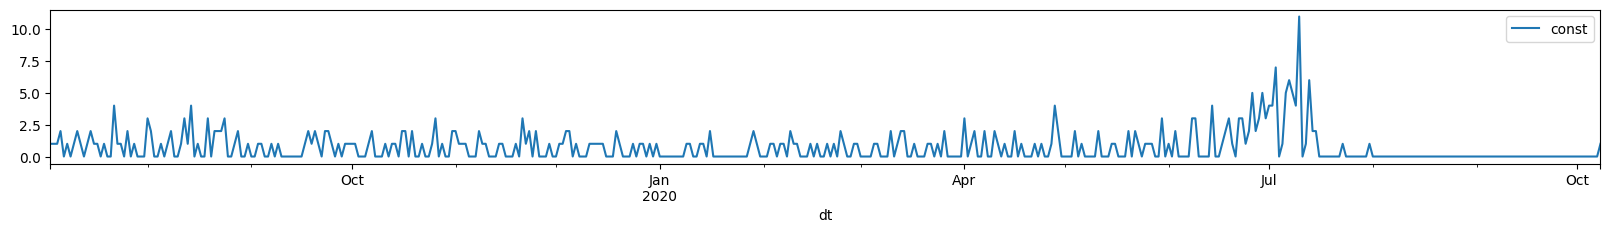

In [53]:
# 날짜 분포
pd.DataFrame({'dt': rt, 'const': 1}).set_index('dt').resample('D').sum().plot(figsize=(20,2))

<Axes: ylabel='Frequency'>

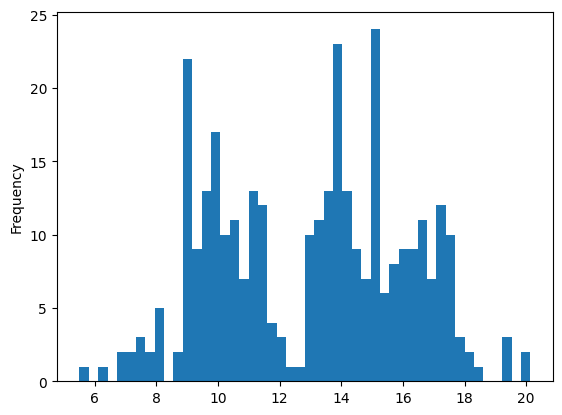

In [54]:
# 시간 분포
rt.map(lambda x: x.hour+x.minute/60).plot(kind='hist', bins=48)

<Axes: ylabel='Frequency'>

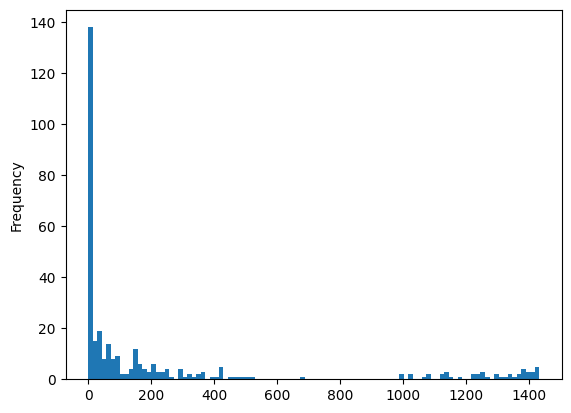

In [55]:
# 인지 시간 - 발생 시간 (분)
(rt-t).map(lambda x: x.seconds/60, na_action='ignore').dropna().plot(kind='hist', bins=100)

### 2.4 날씨

In [56]:
train['날씨'].head()

,날씨
0,맑음
1,맑음
2,맑음
3,흐림
4,맑음


In [57]:
# 카테고리 분포
train['날씨'].value_counts()

,count
날씨,
맑음,17782
흐림,4260
강우,1073
안개,172
강설,97
강풍,38


In [58]:
# 결측 비율
train['날씨'].isna().sum()/len(train)

0.0

### 2.5 기온

In [59]:
train['기온'].head()

,기온
0,1℃
1,10℃
2,14℃
3,12℃
4,0℃


In [80]:
# 형식 일치 확인
(~train['기온'].dropna().str.match(r'^-?\d*(\.\d+)?℃$')).sum()

0

In [83]:
tmp = train['기온'].map(lambda x: x.replace("℃",""))
tmp.replace('',np.nan,inplace = True)
tmp = tmp.astype(float)

In [88]:
# 결측 비율
tmp.isna().sum()/len(tmp)*100

0.1579711382460934

<Axes: ylabel='Frequency'>

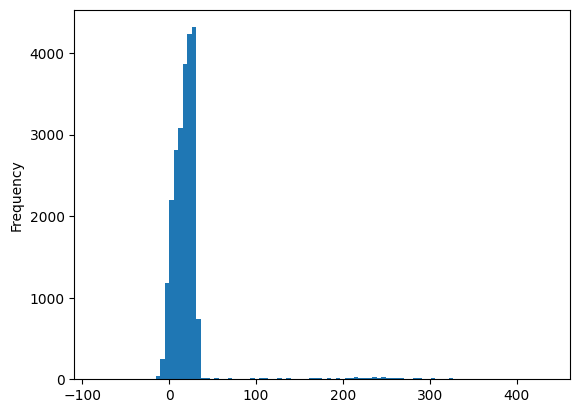

In [86]:
# 기온 분포
tmp.plot(kind='hist', bins=100)

In [114]:
# 기온이 섭씨 100도를 넘는 경우...
train[tmp>100]

,ID,발생일시,사고인지 시간,날씨,기온,습도,공사종류,연면적,층 정보,인적사고,물적사고,공종,사고객체,작업프로세스,장소,부위,사고원인,재발방지대책 및 향후조치계획
313,TRAIN_00313,2023-12-11 오전 07:40,정규작업 -,강우,125℃,82%,건축 / 건축물 / 교육연구시설,"19,017.70㎡","지상 4층, 지하 1층","절단, 베임",없음,건축 > 철근콘크리트공사,건설공구 > 공구류,천공작업,교육연구시설 / 내부,공구류 / 앞,길이가 긴드릴공구사용중 거푸집이 미끄러워 드릴비트 고정이 되지 않아 비트날을 쥐고 ...,사고완 관련 작업공구의 안전한 사용을 위한 보조손잡이 설치와 미끄러짐 방지를 위한 ...
325,TRAIN_00325,2023-12-09 오전 10:40,정규작업 -,흐림,121℃,89%,토목 / 공동구,-,-,부딪힘,없음,토목 > 철근콘크리트공사,건설자재 > 철근,조립작업,/ 인접주변,철근 / 바닥,설치되어있는 안전통로를 이용하지 않고 조립 되어있는 벽체 철근을 밟으며 이동,근로자 불안전한 행동 금지 교육 실시와 안전표지 간판 추가 설치를 통한 재발 방지 ...
477,TRAIN_00477,2023-12-01 오후 02:00,정규작업 -,맑음,119℃,82%,건축 / 건축물 / 공동주택,"105,814.86㎡","지상 29층, 지하 2층",넘어짐(물체에 걸림),없음,기계설비 > 기계설비공사,가시설 > 작업발판,기타,공동주택 / 내부,작업발판 / 바닥,101동 건설용 리프트 하차구간에서 배관양중 작업중 경사로 발판에서 미끄러짐,"경사로 발판상 자재적지금지 및 정리정돈 철저, 작업자 안전교육 실시와 현장 안전관리..."
602,TRAIN_00602,2023-11-24 오후 02:30,정규작업 -,맑음,106℃,50%,건축 / 건축물 / 자동차 관련시설,"8,899.14㎡","지상 4층, 지하 0층",떨어짐(2미터 미만),없음,건축 > 미장공사,가시설 > 비계,마감작업,자동차 관련시설 / 공사장 현장 4층 외부비계,비계 / 4층 비계발판에서 1.8m 아래 비계발판으로 추락,외부 복합판넬 공정에서 자재인양을 위하여 설치된 비계발판을 해체하고 자재 양중을 하...,재발 방지 대책과 향후 조치 계획으로 재발방지 특별안전교육 실시 및 작업환경 사전 ...
630,TRAIN_00630,2023-11-23 오전 08:41,정규작업 -,맑음,195℃,57%,토목 / 항만 / 기타,-,-,끼임,없음,토목 > 철도 및 궤도공사,건설공구 > 몰탈혼합기,타설작업,기타 / 외부,몰탈혼합기 / 상부(위),믹서기 내부에 위치한 믹서기 날에 리모컨 연결줄이 감겨있는 것을 미리 확인하지 못하...,믹서기 상부 덮개의 별도 제작 및 용접을 통한 동일사고 재발 방지.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22883,TRAIN_22883,2019-08-13 오전 08:00,정규작업 -,맑음,262℃,50%,건축 / 건축물 / 공동주택,"13,020㎡","지상 1층, 지하 25층",물체에 맞음,없음,건축 > 철근콘크리트공사,건설자재 > 자재,타설작업,공동주택 / 외부,자재 / 바닥,재해자가 1층 바닥에서 거푸집을 제작하고 있던 중에 근처에서 타워크레인으로 톤백을 ...,타워크레인과 전담신호수에 대한 재발 방지를 위한 특별교육 실시.
22965,TRAIN_22965,2019-08-06 오전 10:53,기타 -,맑음,331℃,51%,건축 / 건축물 / 공장,"3,047.06㎡","지상 3층, 지하 0층",넘어짐(미끄러짐),없음,건축 > 철골공사,기타 > 기타,이동,공장 / 내부,기타 / 바닥,1층바닥에서 미끄러짐,안전확보를 위한 재발 방지 대책과 향후 조치 계획.
23064,TRAIN_23064,2019-07-29 오후 05:20,정규작업 -,맑음,294℃,70%,건축 / 건축물 / 공장,"1,101,562㎡",-,끼임,없음,건축 > 철골공사,부재 > 철골부재,설치작업,공장 / 외부,철골부재 / 고소,고소작업대 탑승과정중 사고발생,안전사고 재발 방지를 위한 감리자 및 현장관리자의 철저한 현장관리 지시.
23223,TRAIN_23223,2019-07-17 오전 11:40,정규작업 -,맑음,265℃,60%,건축 / 건축물 / 근린생활시설,499.80㎡,"지상 3층, 지하 0층",넘어짐(기타),없음,건축 > 철골공사,시설물 > 건물,조립작업,근린생활시설 / 외부,건물 / 고소,2층 캐노피 상부에서 판넬설치 작업 중 창주위에 나사를 박기위해 두손으로 전동공구를...,안전사고 재발 방지를 위한 안전교육 실시


In [115]:
# 기온이 섭씨 40도에서 100도 사이인 경우...
train[(tmp>40) & (tmp <= 100)]

,ID,발생일시,사고인지 시간,날씨,기온,습도,공사종류,연면적,층 정보,인적사고,물적사고,공종,사고객체,작업프로세스,장소,부위,사고원인,재발방지대책 및 향후조치계획
81,TRAIN_00081,2023-12-26 오후 02:00,정규작업 -,맑음,91℃,50%,건축 / 건축물 / 업무시설,"1,292.59㎡","지상 1층, 지하 4층",끼임,없음,건축 > 철근콘크리트공사,건설자재 > 철근,타설작업,업무시설 / 외부,철근 / 옆,작업자 부주의,작업전 사전 안전교육 실시와 작업자의 부주의한 행동 항시 모니터링 감시.
253,TRAIN_00253,2023-12-15 오후 01:15,정규작업 -,강우,41℃,92%,건축 / 건축물 / 공동주택,"252,554㎡","지상 25층, 지하 3층",넘어짐(기타),없음,건축 > 철근콘크리트공사,가시설 > 비계,마감작업,공동주택 / 내부,비계 / 바닥,인천검단 AA16BL 공동주택 1층 벽면 견출작업후 말비계위에서 내려오던 중 발이...,"말비계 사용 부주의에 의한 사고사례 전파교육, 말비계 사용 시 주의사항에 대한 교육..."
293,TRAIN_00293,2023-12-12 오후 03:00,정규작업 -,흐림,94℃,99%,건축 / 건축물 / 공동주택,"43,814.35㎡","지상 21층, 지하 1층",찔림,없음,건축 > 수장공사,건설공구 > 공구류,설치작업,공동주택 / 내부,공구류 / 왼 손목,타정총(타카) 사용시 신체 방향으로 향하지 않게 하여야 하나 불안전한 작업 자세로 ...,"작업 위험요소 파악 및 사고사례 전파, 안전한 작업자세 및 방법에 관한 안전교육 실..."
437,TRAIN_00437,2023-12-04 오후 03:30,정규작업 -,맑음,56℃,27%,토목 / 철도 / 지하철,-,-,끼임,없음,토목 > 토공사,기타 > 기타,인양작업,지하철 / 내부,기타 / 바닥,굴착기 후크에 양수기 모터 가 묶인 슬링벨트 체결 중 우측 네 번째 손가락 끼임,"보통인부 작업 시 2인1조 작업과 직영반장의 관리감독 실시, TBM 시 작업내용 숙..."
543,TRAIN_00543,2023-11-28 오후 01:40,정규작업 -,맑음,53℃,2%,건축 / 건축물 / 공동주택,"83,715㎡","지상 29층, 지하 2층",끼임,없음,건축 > 철근콘크리트공사,건설기계 > 타워크레인,이동,공동주택 / 외부,타워크레인 / 바닥,타워크레인 자재 인양중 신호수와 타워크레인 조종수와의 신호 오류로 인한 사고,"타워크레인 메인지브 충돌방지장치를 수동에서 자동으로 변경 장착하고, 감리단, 시공사..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16960,TRAIN_16960,2020-11-25 오후 02:17,정규작업 -,맑음,46℃,10%,건축 / 건축물 / 교육연구시설,"6,439,952㎡","지상 7층, 지하 5층",기타,기타,건축 > 철골공사,기타 > 기타,설치작업,교육연구시설 / 내부,기타 / 현장 내,작업자가 작업중 어깨통증을 호소함,작업 전 작업자의 상태를 철저히 확인하고 부상 위험을 없애기 위한 안전 관리의 철저함.
17007,TRAIN_17007,2020-11-21 오전 10:30,정규작업 -,흐림,65℃,50%,건축 / 건축물 / 교육연구시설,0㎡,"지상 4층, 지하 0층",떨어짐(5미터 이상 ~ 10미터 미만),없음,건축 > 수장공사,질병 > 질병,마감작업,교육연구시설 / 외부,질병 / 고소,작업 후 이동중 발을 헛디뎌 건물과 시스템비계 사이 틈새로 추락,"비계 난간 보강과 안전관리 철저, 산재보험 처리 및 작업자 회복 지원을 포함한 종합..."
17248,TRAIN_17248,2020-11-04 오후 04:00,정규작업 -,맑음,49℃,45%,토목 / 터널 / 도로터널,-,-,기타,없음,토목 > 해체 및 철거공사,기타 > 기타,해체작업,도로터널 / 내부,기타 / 바닥,버팀 해체 후 지정된 통로가 아닌 되메우기 토사위로 뛰어내려 오다가 왼쪽 무릎 접질림,근로자 이동통로 확보 및 가시설 해체 작업 시 근로자 이동동선 계획 수립.
17397,TRAIN_17397,2020-10-26 오전 09:15,정규작업 -,맑음,96℃,81%,건축 / 건축물 / 노유자시설,"2,282㎡","지상 5층, 지하 1층",떨어짐(3미터 이상 ~ 5미터 미만),없음,기계설비 > 기계설비공사,가시설 > 비계,설비작업,노유자시설 / 내부,비계 / 고소,"고소작업대 작업발판 사이 발판 미흡, 작업발판에서 미끄러짐",재발 방지를 위한 안전교육 실시와 작업장 내 비계 및 안전발판의 전체 점검 및 불안...


### 2.6 습도

In [87]:
train['습도'].head()

,습도
0,30%
1,90%
2,70%
3,55%
4,10%


In [99]:
# 형식 일치 확인
(~train['습도'].dropna().str.match(r'^\d+(\.\d+)?%$')).sum()

0

In [104]:
hmd = train['습도'].str.replace("%","")

In [107]:
# 결측 확인
(hmd=="").sum()

0

In [108]:
hmd = hmd.astype(float)

In [109]:
# 결측 비율
hmd.isna().sum()/len(hmd)*100

0.0

<Axes: ylabel='Frequency'>

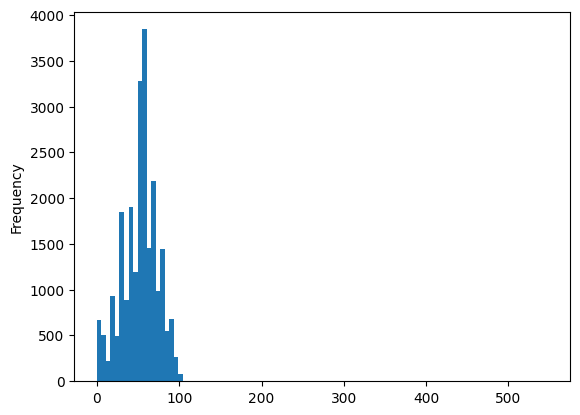

In [110]:
# 습도 분포
hmd.plot(kind='hist', bins=100)

In [112]:
# 습도가 100% 넘는 경우(특수한 경우 가능하다고 함)
train[hmd>100]

,ID,발생일시,사고인지 시간,날씨,기온,습도,공사종류,연면적,층 정보,인적사고,물적사고,공종,사고객체,작업프로세스,장소,부위,사고원인,재발방지대책 및 향후조치계획
20289,TRAIN_20289,2020-03-17 오후 05:00,-,맑음,10.3℃,548%,건축 / 건축물 / 공장,-,-,"절단, 베임",NaN,건축 > 미장공사,가시설 > 기타 가시설,이동,공장 /,기타 가시설 /,"펌프 파운데이션 작업 후 덮개 미설치, 이동편의를 위해 발판이 아닌 로컬 서포트 기...",사고 예방을 위한 작업자 대상 특별 안전 교육 실시와 지정된 통로 이용.
22207,TRAIN_22207,2019-10-07 오전 07:40,-,맑음,10℃,401%,건축 / 건축물 / 공동주택,-,-,넘어짐(기타),없음,기타 > 기타,NaN,운반작업,공동주택 /,/,발을 헛디뎌 넘어져 손목이 골절됨,계단 식별용 도색 등의 전도 방지 조치와 작업 시 집중력을 높이기 위한 안전 교육 ...
23389,TRAIN_23389,2019-07-05 오전 11:25,-,맑음,25℃,101%,건축 / 건축물 / 업무시설,-,-,떨어짐(분류불능),없음,건축 > 철근콘크리트공사,가시설 > 시스템동바리,이동,업무시설 /,시스템동바리 /,안전벨트 미착용 상태에서 고소 작업,근로자 안전벨트 착용 관리 및 작업지휘자 배치와 안전관리 철저 지시를 통한 재발 방...


### 2.7 공사종류

In [61]:
train['공사종류'].head()

,공사종류
0,건축 / 건축물 / 근린생활시설
1,토목 / 터널 / 철도터널
2,건축 / 건축물 / 업무시설
3,토목 / 하천 / 기타
4,건축 / 건축물 / 공동주택


In [116]:
# 카테고리 분포
train['공사종류'].value_counts()

,count
공사종류,
건축 / 건축물 / 공동주택,7024
건축 / 건축물 / 공장,1935
건축 / 건축물 / 업무시설,1811
건축 / 건축물 / 교육연구시설,1448
건축 / 건축물 / 근린생활시설,1400
...,...
건축,1
토목 / 교량 / 복개구조물,1
산업환경설비 / 환경시설,1


In [141]:
# 대분류, 중분류, 소분류로 나눔
ct = train['공사종류'].str.split('/', n=2, expand=True)
ct.columns = ["highcat","midcat","lowcat"]
ct = ct.apply(lambda x: x.str.strip())
ct.head()

,highcat,midcat,lowcat
0,건축,건축물,근린생활시설
1,토목,터널,철도터널
2,건축,건축물,업무시설
3,토목,하천,기타
4,건축,건축물,공동주택


In [133]:
# 대분류 분포
ct['highcat'].value_counts()

,count
highcat,
건축,17727
토목,4599
산업환경설비,893
조경,202
건축,1


In [134]:
# 중분류 분포
ct['midcat'].value_counts()

,count
midcat,
건축물,17700
상하수도,1091
도로,1053
발전시설,528
기타,505
교량,426
터널,360
하천,358
철도,279


In [135]:
# 소분류 분포
ct['lowcat'].value_counts()

,count
lowcat,
공동주택,7024
공장,1935
업무시설,1811
교육연구시설,1448
근린생활시설,1400
...,...
중수도/하폐수처리수 재이용시설,3
홍수전용댐,2
파제제,2


In [127]:
def check_one_to_many_mapping(df: pd.DataFrame, col1: str, col2: str):
    """
    col1 → col2가 1:N 매핑인지 확인하는 함수.
    즉, col1은 여러 col2를 가질 수 있지만, col2는 반드시 하나의 col1에만 매핑되어야 한다.

    :param df: pandas DataFrame
    :param col1: 기준이 되는 컬럼 (1)
    :param col2: 매핑되는 컬럼 (N)
    :return: 1:N 매핑이면 True, 아니면 문제 있는 매핑을 출력하고 False 반환
    """
    col2_violations = df.groupby(col2)[col1].nunique()

    # col2가 여러 col1에 매핑된 경우 찾기
    invalid_col2 = col2_violations[col2_violations > 1].index.tolist()

    if not invalid_col2:
        return True  # 1:N 매핑이 성립됨

    if invalid_col2:
        return df[df[col2].isin(invalid_col2)].sort_values(col2)


In [142]:
# 대분류와 중분류 관계에서, 중분류가 여러 대분류와 매칭되는 경우
check_one_to_many_mapping(ct, "highcat","midcat")['midcat'].unique()

array(['기타'], dtype=object)

In [143]:
# 중분류와 소분류 관계에서, 중분류가 여러 대분류와 매칭되는 경우
check_one_to_many_mapping(ct, "midcat","lowcat")['lowcat'].unique()

array(['기타'], dtype=object)

In [148]:
# 결측 비율
train['공사종류'].isna().sum()/len(train) * 100

0.0

### 2.8 연면적

In [62]:
train['연면적'].head()

,연면적
0,"4,892.77㎡"
1,-
2,"1,994.62㎡"
3,-
4,"59,388.93㎡"


In [153]:
# 결측 확인
area = train['연면적'].replace("-",np.nan)

In [158]:
# 형식 일치 확인
(~area.dropna().str.match(r'^(?:[1-9]\d{0,2}(?:,\d{3})*|\d+)(\.\d+)?㎡$')).sum()

0

In [162]:
# 전처리
area = area.map(lambda x:x.replace("㎡","").replace(",",""), na_action="ignore")
area = area.astype(float)

<Axes: ylabel='Frequency'>

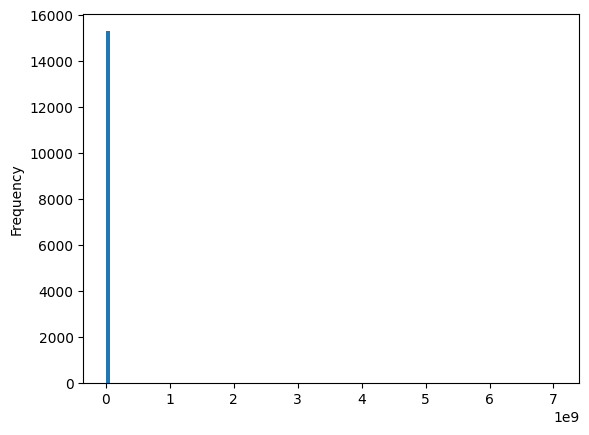

In [207]:
# 연면적 분포
area.plot(kind='hist', bins = 100)

In [189]:
area.describe()

,연면적
count,1.533400e+04
mean,3.616433e+06
std,1.152921e+08
min,0.000000e+00
25%,5.694745e+03
50%,3.360500e+04
75%,1.217450e+05
max,7.050722e+09


In [192]:

def detect_outliers(series: pd.Series, lower: float = 1.5, upper: float = 1.5):
    """
    IQR을 사용하여 이상치를 감지하는 함수.

    :param series: pandas Series (수치형 데이터)
    :param lower: IQR 하한 기준 (기본값: 1.5)
    :param upper: IQR 상한 기준 (기본값: 1.5)
    :return: lower_bound, upper_bound, 이상치 리스트
    """
    Q1 = series.quantile(0.25)  # 1사분위수
    Q3 = series.quantile(0.75)  # 3사분위수
    IQR = Q3 - Q1  # 사분위 범위

    lower_bound = Q1 - (lower * IQR)  # 하한값
    upper_bound = Q3 + (upper * IQR)  # 상한값

    # 이상치 필터링
    outliers = series[(series < lower_bound) | (series > upper_bound)]

    print(f"📌 IQR 기준 이상치 탐지")
    print(f" - Q1 (25%): {Q1:.2f}")
    print(f" - Q3 (75%): {Q3:.2f}")
    print(f" - IQR: {IQR:.2f}")
    print(f" - 하한 (lower_bound): {lower_bound:.2f}")
    print(f" - 상한 (upper_bound): {upper_bound:.2f}")
    print(f" - 이상치 개수: {outliers.count()}개\n")

    return lower_bound, upper_bound, outliers.tolist()

In [195]:
lower_bound, uppser_bound, outliers = detect_outliers(area)

📌 IQR 기준 이상치 탐지
 - Q1 (25%): 5694.74
 - Q3 (75%): 121745.00
 - IQR: 116050.26
 - 하한 (lower_bound): -168380.64
 - 상한 (upper_bound): 295820.38
 - 이상치 개수: 1205개



<Axes: ylabel='Frequency'>

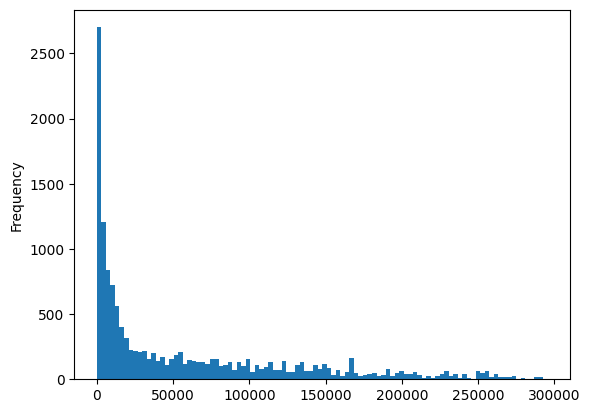

In [199]:
# 면적 분포(IQR로 너무큰 값 뺌)
area[area<295820.38].plot(kind='hist', bins = 100)

In [201]:
# 결측률
area.isna().sum()/len(area) * 100

34.53163692255144

### 2.9 층 정보

In [63]:
train['층 정보'].head()

,층 정보
0,"지상 14층, 지하 3층"
1,-
2,"지상 5층, 지하 0층"
3,-
4,"지상 27층, 지하 3층"


In [229]:
# 결측 확인
floors = train['층 정보'].replace("-",np.nan)

In [213]:
# 형식 일치 확인
(~floors.dropna().str.match(r'^지상\s\d+층,\s지하\s\d+층$')).sum()

0

In [209]:
import re

def extract_numbers(s):
    return re.sub(r'\D', '', s)  # \D는 숫자가 아닌 문자 제거

In [230]:
# 전처리(지상, 지하 각각 나누기)
floors = floors.str.split(', ', n=1, expand=True)
floors.columns = ['upper', 'under']
floors = floors.applymap(extract_numbers, na_action = "ignore")
floors = floors.astype(float)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

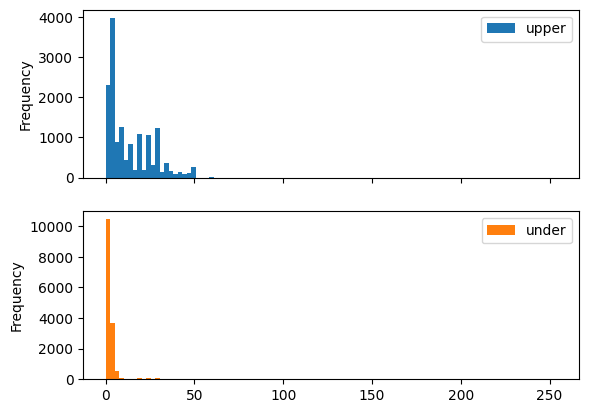

In [232]:
# 지상, 지하 층 분포
floors.plot(kind = 'hist', bins = 100, subplots=True)

In [235]:
# 지상 100층이 넘는 경우
train[floors['upper']>100]

,ID,발생일시,사고인지 시간,날씨,기온,습도,공사종류,연면적,층 정보,인적사고,물적사고,공종,사고객체,작업프로세스,장소,부위,사고원인,재발방지대책 및 향후조치계획
9250,TRAIN_09250,2022-06-11 오전 09:50,정규작업 -,맑음,25℃,53%,건축 / 건축물 / 업무시설,"913,955.75㎡","지상 105층, 지하 7층",끼임,없음,토목 > 토공사,부재 > 철골부재,운반작업,업무시설 / 외부,철골부재 / 옆,"H-Beam 위치 미세조정 시 손 협착 발생, 재해자가 인양 홀에 손가락이 들어간 ...","이음 용접이 완료된 H-Beam 적재 시 2단 적재 금지, H-Beam 사이 간격 ..."
10831,TRAIN_10831,2022-03-02 오전 07:40,정규작업 -,맑음,4℃,40%,건축 / 건축물 / 공동주택,"256,774㎡","지상 254층, 지하 2층",부딪힘,없음,건축 > 철근콘크리트공사,건설공구 > 공구류,형틀 및 목공,공동주택 / 외부,공구류 / 바닥,작업자의 공구 관리 또는 소지방법 소홀로 인한 재해,작업자 단순과실로 인한 재발 방지 대책 및 향후 조치 계획 없음.
15984,TRAIN_15984,2021-02-23 오후 04:30,정규작업 -,맑음,26℃,40%,건축 / 건축물 / 공동주택,"661,000㎡","지상 101층, 지하 5층",떨어짐(2미터 미만),없음,기계설비 > 기계설비공사,건설자재 > 덕트,설치작업,공동주택 / 내부,덕트 / 하부(아래),사다리 작업자 교육 및 관리 미흡 (하강이 완료되지 않은 상태에 보조작업자가 사다리...,"하자보수 작업 시 법 및 회사 기준에 따른 안전활동 실시, 신규 투입 시 해당 작업..."


In [236]:
# 지하 100층이 넘는 경우
train[floors['under']>100]

,ID,발생일시,사고인지 시간,날씨,기온,습도,공사종류,연면적,층 정보,인적사고,물적사고,공종,사고객체,작업프로세스,장소,부위,사고원인,재발방지대책 및 향후조치계획


In [239]:
# 결측률
floors.isna().sum().sum()/2/len(floors) * 100

35.009819827512594

### 2.10 인적사고

In [64]:
train['인적사고'].head()

,인적사고
0,떨어짐(5미터 이상 ~ 10미터 미만)
1,끼임
2,넘어짐(미끄러짐)
3,기타
4,넘어짐(미끄러짐)


In [241]:
# 카테고리 분포
train['인적사고'].value_counts()

,count
인적사고,
물체에 맞음,3460
끼임,2549
넘어짐(미끄러짐),2188
넘어짐(기타),2063
기타,1915
부딪힘,1815
떨어짐(2미터 미만),1735
"절단, 베임",1661
넘어짐(물체에 걸림),1490


In [242]:
# 결측률
train['인적사고'].isna().sum()/len(train) * 100

0.13662368713175646

### 2.11 물적사고

In [65]:
train['물적사고'].head()

,물적사고
0,없음
1,없음
2,없음
3,전도
4,없음


In [245]:
# 카테고리 분포
train['물적사고'].value_counts()

,count
물적사고,
없음,20214
기타,599
전도,360
낙하,310
충돌,199
붕괴,71
"파열,파단",64
탈락,60
화재,48


In [246]:
# 결측률
train['물적사고'].isna().sum()/len(train) * 100

6.36154043207241

### 2.12 공종

In [66]:
train['공종'].head()

,공종
0,건축 > 철근콘크리트공사
1,토목 > 터널공사
2,건축 > 철근콘크리트공사
3,토목 > 하천공사
4,건축 > 해체 및 철거공사


In [247]:
# 카테고리 분포
train['공종'].value_counts()

,count
공종,
건축 > 철근콘크리트공사,6348
기타 > 기타,2066
건축 > 가설공사,1634
기계설비 > 기계설비공사,939
토목 > 토공사,907
토목 > 가설공사,817
건축 > 철골공사,781
건축 > 해체 및 철거공사,747
토목 > 철근콘크리트공사,711


In [253]:
# 대분류, 소분류로 나누기
ct_ = train['공종'].str.split(' > ', n=2, expand=True)
ct_.columns = ['major', 'minor']
ct_ = ct_.apply(lambda x: x.str.strip())
ct_.head()

,major,minor
0,건축,철근콘크리트공사
1,토목,터널공사
2,건축,철근콘크리트공사
3,토목,하천공사
4,건축,해체 및 철거공사


In [254]:
# 대분류 분포
ct_['major'].value_counts()

,count
major,
건축,14251
토목,5245
기타,2066
기계설비,1000
전기설비,529
산업설비,311
통신설비,9


In [255]:
# 소분류 분포
ct_['minor'].value_counts()

,count
minor,
철근콘크리트공사,7059
가설공사,2520
기타,2066
해체 및 철거공사,1037
기계설비공사,939
토공사,907
철골공사,781
건축물 부대공사,646
수장공사,593


In [258]:
# 대분류와 소분류 관계에서, 소분류가 여러 대분류와 매칭되는 경우
check_one_to_many_mapping(ct_, "major","minor").head()

,major,minor
10971,건축,가설공사
6192,건축,가설공사
16593,토목,가설공사
16571,토목,가설공사
16567,건축,가설공사


In [259]:
# 결측 비율
train['공종'].isna().sum()/len(train) * 100

0.046964392451541284

### 2.13 사고객체

In [67]:
train['사고객체'].head()

,사고객체
0,건설자재 > 철근
1,건설자재 > 볼트
2,기타 > 기타
3,부재 > 교각 기초
4,기타 > 건설폐기물


In [260]:
# 카테고리 분포
train['사고객체'].value_counts()

,count
사고객체,
기타 > 기타,3863
건설자재 > 자재,2767
건설공구 > 공구류,1997
가시설 > 거푸집,1821
가시설 > 비계,1346
...,...
가시설 > 클라이밍콘,1
건설기계 > 아스팔트피니셔,1
시설물 > 주탑,1


In [261]:
# 대분류, 소분류로 나누기
ao = train['사고객체'].str.split(' > ', n=2, expand=True)
ao.columns = ['major', 'minor']
ao = ao.apply(lambda x: x.str.strip())
ao.head()

,major,minor
0,건설자재,철근
1,건설자재,볼트
2,기타,기타
3,부재,교각 기초
4,기타,건설폐기물


In [262]:
# 대분류 분포
ao['major'].value_counts()

,count
major,
가시설,6584
건설자재,4533
기타,4450
건설공구,2445
건설기계,1864
부재,980
시설물,971
토사 및 암반,530
질병,378


In [263]:
# 대분류 분포
ao['minor'].value_counts()

,count
minor,
기타,3863
자재,2767
공구류,1997
거푸집,1821
비계,1346
...,...
클라이밍콘,1
아스팔트피니셔,1
주탑,1


In [265]:
# 대분류와 소분류 관계에서, 소분류가 여러 대분류와 매칭되는 경우
check_one_to_many_mapping(ao, "major","minor")

True

In [266]:
# 결측 비율
train['사고객체'].isna().sum()/len(train) * 100

2.9331397831098966

### 2.14 작업프로세스

In [68]:
train['작업프로세스'].head()

,작업프로세스
0,설치작업
1,운반작업
2,형틀 및 목공
3,조립작업
4,해체작업


In [267]:
# 카테고리 분포
train['작업프로세스'].value_counts()

,count
작업프로세스,
설치작업,4117
이동,2506
해체작업,2503
운반작업,2057
정리작업,1526
기타,1509
조립작업,1130
형틀 및 목공,915
타설작업,797


In [268]:
# 결측 비율
train['작업프로세스'].isna().sum()/len(train) * 100

0.26897788404064554

### 2.15 장소

In [69]:
train['장소'].head()

,장소
0,근린생활시설 / 내부
1,철도터널 / 내부
2,업무시설 / 내부
3,기타 / 동산교 신축구간
4,공동주택 / 내부


In [269]:
# 카테고리 분포
train['장소'].value_counts()

,count
장소,
공동주택 / 내부,3548
공동주택 / 외부,1867
공장 / 내부,1103
업무시설 / 내부,1032
공동주택 /,877
...,...
공공폐수처리시설 / 현장내 휴게소,1
창고시설 / 철골 트러스 부분,1
도로 / 협력사 사무실 마당,1


In [336]:
# 대분류, 소분류로 나눔
loca = train['장소'].str.split('/', n=1, expand=True)
loca.columns = ["major","minor"]
loca = loca.apply(lambda x: x.str.strip())
loca.head()

,major,minor
0,근린생활시설,내부
1,철도터널,내부
2,업무시설,내부
3,기타,동산교 신축구간
4,공동주택,내부


In [337]:
# 대분류 분포
loca['major'].value_counts()

,count
major,
공동주택,7024
공장,1935
업무시설,1811
교육연구시설,1448
근린생활시설,1400
...,...
중수도,3
홍수전용댐,2
파제제,2


In [338]:
# 소분류 분포
loca['minor'].value_counts()

,count
minor,
내부,10478
외부,6426
,3145
인접주변,989
외벽,366
...,...
호안) / 앞비탈면,1
112동 옥상,1
파일제작장,1


In [340]:
# 나누기가 어렵습니다..
loca[loca['minor'].str.contains('/', na=False)]

,major,minor
196,제방(통관,호안) / 내부
371,제방(통관,호안) / 인접주변
431,제방(통관,호안) / 내부
455,제방(통관,호안) / 외부
1068,수문,통문 / 인접주변
...,...,...
22167,제방(통관,호안) / 인접주변
22317,공장,동서포트 6층 I~J / 10~12열
22332,제방(통관,호안) /
22556,공장,남서포트 지하1층 B/50열


In [275]:
# 결측 비율
train['장소'].isna().sum()/len(train) * 100

0.0

### 2.16 부위

In [70]:
train['부위'].head()

,부위
0,철근 / 고소
1,볼트 / 바닥
2,기타 / 바닥
3,교각 기초 / 바닥
4,건설폐기물 / 바닥


In [276]:
# 카테고리 분포
train['부위'].value_counts()

,count
부위,
기타 / 바닥,1854
자재 / 바닥,1056
공구류 / 바닥,707
/,637
기타 / 상부(위),464
...,...
자재 / 오른쪽 손등,1
조적벽체 / 자재이동,1
굴착기 / 굴착기 전도,1


In [277]:
# 대분류, 소분류로 나눔
pt = train['부위'].str.split('/', n=1, expand=True)
pt.columns = ["major","minor"]
pt = pt.apply(lambda x: x.str.strip())
pt.head()

,major,minor
0,철근,고소
1,볼트,바닥
2,기타,바닥
3,교각 기초,바닥
4,건설폐기물,바닥


In [278]:
# 대분류 분포
pt['major'].value_counts()

,count
major,
기타,3863
자재,2767
공구류,1997
거푸집,1821
비계,1346
...,...
클라이밍콘,1
아스팔트피니셔,1
주탑,1


In [279]:
# 소분류 분포
pt['minor'].value_counts()

,count
minor,
바닥,7337
상부(위),3774
,3167
하부(아래),1329
옆,1301
...,...
폰툰(작업용 부유시설),1
벽체 거푸집 해체 중 절단된 굵은 철사 비래에 의한 맞음,1
1층 칸막이 철거 폐기물,1


In [280]:
# 결측 비율
train['부위'].isna().sum()/len(train) * 100

0.0

### 2.17 사고원인

In [281]:
train['사고원인'].head()

,사고원인
0,"고소작업 중 추락 위험이 있음에도 불구하고, 안전난간대, 안전고리 착용 등 안전장치..."
1,부주의
2,3층 슬라브 작업시 이동중 미끄러짐
3,"교각 기초철근 조립 중 강한 바람에 의해 기둥측 주철근이 균형을 잃고 전도되어, 하..."
4,근로자의 부주의


<Axes: ylabel='Frequency'>

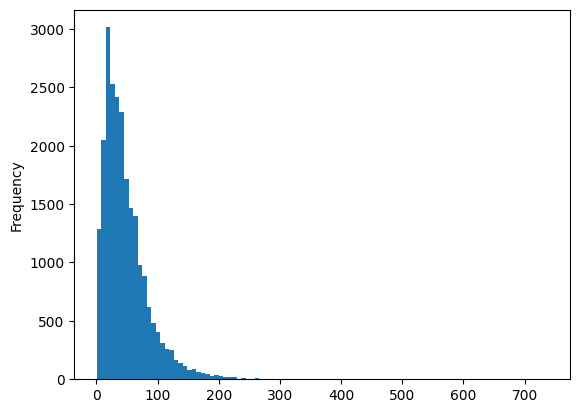

In [287]:
# 문장길이분포
train['사고원인'].map(len, na_action = "ignore").plot(kind = 'hist', bins = 100)

In [297]:
# 가장 긴 문장
train['사고원인'][18830]

'신청인의 요양급여신청 관련하여 사실에 근거하여 아래와 같이 보험가입자의견서를 작성하여 근로복지공단 통영지사에 제출함(첨부 보험가입자의견서 참조)1. 신청인이 당사현장에서 행한 업무는 작업내용도 단순하며 특별히 허리에 부담이 되지 않는 등 업무량이나 업무강도가 일용근로자들이 일반적으로 하는 정도에 불과할 뿐이었다는 점2. 신청인은 신호수 보조공으로서의 업무내용은 숙달된 신호수의 지시에 따라 크레인 작업시 인양물체 슬링벨트 설치 및 신호전달과 현장 정리정돈 등의 단순 보조업무만수행하였을 뿐, 특별히 허리에 부담이 가는 작업은 아니라는 점3. 신청인이 주장하는 상병은 장기간에 걸쳐서 서서히 발현된 전형적인 퇴행성(만성) 허리 질환의 일환임이 명백하고, 자연경과적인 퇴행성(진구성) 변화에 의한 기존질환인바당사 현장의 업무와의 인과관계를 인정할 수 없다는 점4. 신청인이 기존 질병을 “2019. 06.24. M5243 경추통,경흉추부” 은폐하고 경추통,경흉추부를 연계하여 허리에 통증을 느꼈다고 주장하며 마치 “요추의 염좌”가 현장에서 발생한업무상 사고라고 주장하고 있는 점5. 업무와 재해간의 상당인과관계에 대한 입증책임은 신청인에게 있음에도 불구하고, 신청인의 경우 본 사안과 관련하여 인과관계를 입증할 만한 객관적인 입증자료를 제출하지 못하고있다는 점 등의 여러 정황을 종합하여 볼 때 당사로서는 신청인이 주장하는 재해를 업무상 재해로 인정할 수 없다는 내용으로  보험가입자의견서를 근로복지공단 통영지사에 제출함'

In [302]:
# 문장 길이가 1인 경우(비정상)
train[train['사고원인'].map(len, na_action = "ignore") == 1]['사고원인']

,사고원인
4332,가
7346,-
8579,-
8716,-
8767,-
13894,.
15486,.
15584,.
15955,.
16299,.


In [303]:
# 문장 길이가 2인 경우(정상)
train[train['사고원인'].map(len, na_action = "ignore") == 2]['사고원인']

,사고원인
4871,상동
6174,충돌
6222,끼임
7335,질병
8702,과실
8828,협착
9144,질병
9976,관로
10098,돌풍
10155,과실


In [308]:
# 전처리
ac = train['사고원인'].map(lambda x: np.nan if len(x)==1 else x, na_action = "ignore")

In [311]:
# 결측 비율
ac.isna().sum()/len(ac) * 100

0.3842541200580651

### 2.18 재발방지대책 및 향후조치계획(target)

In [282]:
train['재발방지대책 및 향후조치계획'].head()

,재발방지대책 및 향후조치계획
0,고소작업 시 추락 위험이 있는 부위에 안전장비 설치.
1,재발 방지 대책 마련과 안전교육 실시.
2,현장자재 정리와 안전관리 철저를 통한 재발 방지 대책 및 공문 발송을 통한 향후 조...
3,"위험성 평가 및 교육을 통해 작업장 내 위험요인과 안전수칙을 근로자에게 전파하고, ..."
4,자재 정리 작업 시 세부 작업 방법에 대한 교육 실시와 작업 구간 이동 경로 점검 ...


<Axes: ylabel='Frequency'>

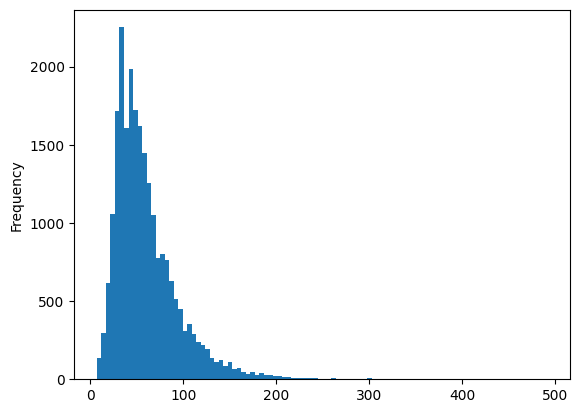

In [312]:
# 문장길이분포
train['재발방지대책 및 향후조치계획'].map(len, na_action = "ignore").plot(kind = 'hist', bins = 100)

In [316]:
# 가장 긴 문장
train['재발방지대책 및 향후조치계획'][9928]

'신규 근로자 성향 및 개인 능력에 따른 작업 배치, 고령자 및 개인 질환자 선별 후 직종 변경, 자재인력 하역 작업 시 관리자 통제하에 중점 관리 사항 점검, 2인 1조 작업 진행 및 단독 작업 금지, 작업 구역 이격 통제, 단기 근로자에 대한 위험 요인 사전 교육, 안전관리자 현장 밀착형 안전 관리 강화, 작업 내용 및 위험 요인에 대한 현장 교육, 안전지킴이 조속 투입으로 유기적 안전 관리 체계 구축, 신규 근로자 현장 적응기 도입 및 안전 수칙 위반자 제재 강화, 지연 보고에 따른 안전 관리 보고 체계 교육 및 공유, 비계파이프 자재 운반 시 2인 1조 작업 지도, 화물차 적재 상부 미끌림 방지 설비 설치, 작업 난이도에 따른 전문 작업 인력 투입, 서두리지 않게 작업 진행 유도, 눈에 잘 보이는 안전모 외피 제작 및 현장 밀착 관리, 작업 반장의 작업 이해도 및 관리 능력 강화를 위한 역량 강화 교육, 용역 근로자에 대한 세밀한 작업 방법 및 위험성 교육 실시.'

In [318]:
# 가장 짧은 문장
train[train['재발방지대책 및 향후조치계획'].map(len, na_action = "ignore") == 7]['재발방지대책 및 향후조치계획']

,재발방지대책 및 향후조치계획
1105,안전교육 실시
3185,안전교육 실시
3647,안전교육 실시
4348,안전교육 실시
4805,안전교육 실시
6823,안전교육 실시
11252,안전교육 실시
12451,안전교육 실시
13888,안전교육 실시
14019,안전교육 실시


In [319]:
# 결측 비율
train['재발방지대책 및 향후조치계획'].isna().sum()/len(train) * 100

0.0

# 결론(의견)

특이사항

- 발생일시 : 00:00은 오전 00:00시, 12:00은 오후12:00시로 표현되어, 타입변환시 안일하게 오후일 경우 12를 더했다간 시간오류가 생깁니다. 그리고 사고 발생에 시계열 패턴이 있습니다. 주기성 패턴을 제외하면 계절 편차 없이 약 4년간 고르게 포함되어있습니다. 사고 시간대는 오전/오후 두 정규분포가 합쳐진 모양입니다.
- 사고인지 시간 : 작업종류와 인지시간 두 가지 정보가 담겨있었습니다. 그리고 인지시간의 결측비율이 약 98%로 매우 높습니다. 사고 발생 후 인지하기까지 걸린 시간은 기록된 경우 20시간을 넘어가는 경우도 있었습니다.
- 기온 : 섭씨 40도, 심지어 100도가 넘는 비정상 데이터가 있습니다.
- 습도 : 100%가 넘는 경우 세 건 있습니다.(최대 548%)
- 공사종류 : one to many로 매칭되는 대분류/중분류/소분류로 나뉩니다.
- 연면적 : 결측률이 34%로 높은 편입니다.
- 공종 : many to many로 매칭되는 대분류, 소분류로 나뉩니다.
- 사고객체 : one to many로 매칭되는 대분류와 소분류로 나뉩니다.
- 장소 : 공종처럼 규칙적으로 나뉘지 않았습니다. 특이사항은 발견되지 않아서 그냥 그대로 쓰면 될 것 같습니다.
- 부위 : 규칙적으로 나뉘어지는데, 뒤에 나오는 요소가 요추 2,3번 미세골절, 자재이동, 바닥 이렇게 여러 개념이 혼재해있습니다
- 사고원인 : 문장 길이가 1인 경우 비정상데이터였고 그 외 특이사항은 못찾았습니다.
- 재발방지대책 및 향후조치계획(타겟) : 대책이나 계획이 여러개 나오는데, 몇 개를 맞추느냐도 점수에 영향을 줄 것 같습니다.

# 계획

1. 미팅에서 피드백 후 결정